> PCA is a dimensionality reduction technique useful for gaining insight into the behavior of a data set. The resulting lower dimensional feature space can be used for further downstream ML tasks such as classification.

There are multiple derivations of the results. The problem can be framed in equivalent ways, such as obtaining the eigenvector/eigenvalue pairs of the data's covariance matrix, the calulation of the Singular Value Decomposition (SVD), and solving an optimization problem. In this notebook, we briefly summarize the calulation of the Principal Components in a non-rigorous way, generate a contrived example from a system of differential equations, and see what inferences can be made from PCA in a purely data driven approach to analyszing that system.

Before doing this, there are two important considerations prior to implementing PCA: _feature preprocessing_ and *assumptions of the algorithm*.

<u>__Requirements__<u>

- Data should be shifted to a mean of zero (subtract the mean of each feature).
- Data should be recorded on the same scale. If they are different units or scales, then one may dominante the algorithm and return bad results. In this case the approach is often to standardize the data (subtract the mean and divide by the standard deviation).
- There must be a linear correlation between the features. Otherwise, the covariance matrix is already daigonal and the features are independent. In this case, you can perform PCA by simply projecting onto the variables with the greates variance.

<u>__Algorithm__<u>

Assume observed data is organized in a matrix $X \in R^{n \times m}$, with $n$ samples of $m$ features each.

PCA aims to find _p_ orthogonal directions on which to project the data, with $p<m$. These directions will capture the maximum variability in the data. In order to accomplish this, we calculate the covariance matrix of $X$:
$$C \equiv Cov(X) = \frac{1}{n-1}X^TX \in R^{m \times m}$$
This is a symmetric matrix with off diagonals non-zero. We can diagonalize $C$ by finding its corresponding eigevectors and eigenvalues:
$$C = V \Lambda V^{-1}$$

Linear algebra can guarantee real eigenvalues and eigenvectors with the covariance matrix, though complex eigenvectors may exist.

The entries in the diagonal matrix $\Lambda = diag(\lambda_0\;\;\;\lambda_1, ...)$ give the variances in each principal direction and the column vectors in $V$ give the principal directions we wish to project the data onto. The column entries in $V$ are called the *_loadings_ as they indicate how much of the original features are expressed in the new PCA features.

*It should be noted here that _loadings_ and eigenvector entries are often considered separate concepts. Loadings are the eigenvectors (unit lenght) scaled up via multiplication by the eigenvalues. This equates to stretching the eigenvectors/principal axes/principal directions to reach the ends of the dataset. They are the same up to a constant scaling.

If $PC_k$ represents the principal components projected down to $k$-dimensions, and $\vec{v_i}$ is the $i$-th column vector of $V$, then:

$$PC_k  = XV = X [\vec{v_1}\;\;\;\vec{v_2}\;\;\;...\;\;\;\vec{v_k}] = [X\vec{v_1}\;\;\;X\vec{v_2}\;\;\;...\;\;\;X\vec{v_k}] $$

and $X\vec{v_i}$ represents the linear combination of the columns of $X$ (i.e., the original $m$ features) with the entries in $\vec{v_i}$ as coefficients. So, $\vec{v_i}$ represents the 'importance' of each original feature is constructing the new feature space.

This projection of our data is called the _principal components_ and is calculated as $Y = XV$, as above. The data in this new space can be shown to have a diagonal covariance matrix (by calculating $Y^{T}Y$). This means the data features are now independent in this eigenbasis.  __Connection__: If we were to standardize these new features in PC space by dividing by $\sqrt{\lambda_i}$, this would equate to performing whitening (or '_sphering_') on the data.

<u>__SVD comments__<u>

The SVD (Singular Value Decomposition) of X, written as the matrix factorization $$X = U \Sigma V^T$$ can also yield the eigenvalues and eigenvectors. The eigenvectors will be the right singular (column) vectors ($V$) and the eigenvalues will be related to the singular values by the equation $$\lambda_i = \frac{\sigma_{i}^2}{n-1}$$

Futher, the principal components are calculated as $XV = U\Sigma$ and the loadings are given by the columns of $\frac{1}{\sqrt{n-1}} V\Sigma$.

<u>__Application__<u>

Consider the linear system of differential equations given by $A \in R^{2 \times 2}$: $$\dot{\vec{y}} = A \vec{y}$$

The solution $\vec{y}(t) = [x_1(t), x_2(t)]^T$ for some initial condition at $t = 0$ has the form: $$\vec{y} = e^{At}\vec{y}(0)$$
The matrix exponential evaluates to a matrix and can be calculated using the power series definition of $e^x$.

The value of the matrix $A$ determines what type of system we have. We choose $A$ carefully so that it has purely imaginary (of the form $\pm bi$ for some real b) eigenvalues. This guarantees the solution is a _center_ (elliptical solutions about the origin) and will not spiral to infinity or zero. Such a requirement is satisfied by setting: $$A = \begin{bmatrix}0&1\cr-9&0\end{bmatrix}$$

In this case, the eigenvalues are $\pm 3i$. The corresponding eigenvectors are also complex because the eigenvalue is complex. They also come in conjugate pairs: $$\vec{v} = \begin{pmatrix} \pm i /3 \cr1\cr\end{pmatrix}$$

Given the complex eigenvalues, we know this system has two linearly independent solutions that are real-valued. They will take the form
$\vec{s_1} = \operatorname{Re}(s^*)$ and $\vec{s_2} = \operatorname{Im}(s^*) $, where $$s^* = \begin{pmatrix} -i /3 \cr1\cr\end{pmatrix} e^{3it} $$ 

The general solution is therefore given by: $$\vec{y}(t) = c_1\vec{s_1} + c_2\vec{s_2}$$

This gives us the general solution:

$$\vec{y}(t) = c_1 \begin{pmatrix} sin(3t)/3 \cr cos(3t) \cr\end{pmatrix} + c_2 \begin{pmatrix} -cos(3t)/3 \cr sin(3t) \cr\end{pmatrix}  $$

If we start at the coordinate $\begin{pmatrix} 3 \cr3\cr\end{pmatrix} $, then our specific solution is parameterized by: $$ \vec{y}(t) = \begin{pmatrix} sin(3t) + 3cos(3t) \cr 3cos(3t) -9sin(3t) \cr\end{pmatrix} $$

This corresponds to an ellipse oscillating around the origin in the $x$ and $y$ directions. The following image shows the vector field of this system and the unique solution to our initial condition (gray square is the starting point, moving clockwise). The image is generated by the phase plane plotter [located here](https://aeb019.hosted.uark.edu/pplane.html) by Ariel Barton.


<div style="text-align: center;">
    <img src="images/oscillation_pca_med.png" alt="Description of Image">
</div>


Note if $y = 0$, there is no motion is the x direction. Further, if $x = 0$, there is no motion in the $y$ direction. This is consistent with the $A$ matrix above.

At this point, it is worth pointing out that the derivatives of each feature are related in a linear way by $A$, however the variables themselves are not linearly related. They are ellipses in $x$ and $y$ (quadratics). Generally, PCA is not a great approach for this type of problem as a system like this is often unstable and swirls to or from the origin. In this special case, however, the system is stable and is centered at the origin, so PCA might return _something_ valuable.

The actual distribution for $x$ and $y$ will depend on the time dynamics of the problem. For example, it might turn the top and bottom corners more slowly than transversing the curve in the vertical direction. The quantity of data we see will depend on the interval of time we sample from and the sampling frequency (see below histograms). 

<u>__Truth Plots__<u>

First, we take the solutions in time and plot them to better understand the system dynamics. Since one period of oscillation is $\frac{2\pi}{3}$ units of time, we plot from $t = 0$ to $t = p\frac{2\pi}{3} $ to visualize $p$ periods, coded below to be configurable. Note plotly allows you to hover over charts to view the values and labels.

In [1]:
# Imports
import scipy
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots

In [2]:
p = 5 # p >= 1
L = p*(2*np.pi/3 + 0.01)
t = np.arange(0, L , 0.1)
x_t = np.sin(3*t) + 3*np.cos(3*t)
y_t = 3*np.cos(3*t) - 9*np.sin(3*t)

fig = px.line({'t': t, 'x(t)': x_t, 'y(t)':y_t}, x='t', y = ['x(t)', 'y(t)'], title = f'Solutions in time with {p} periods shown')
for i in range(1, p + 1):
    fig.add_vline(x = i*2*np.pi/3)
#fig.show()

Here is a static image produced from the above plot for viewing in GitHub. For an interactive plot and to experience the interactive capabilities of plotly, I recommnd viewing this notebook in a Jupyter environment.

<center>
    <div>
       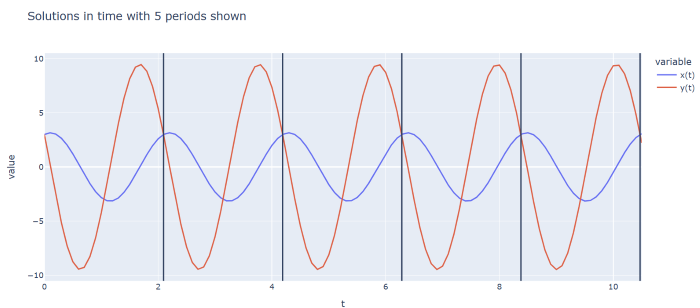
    </div>
</center>

Now we visualize the distribution of $x$ and $y$ for a simulated trip around the ellipse by setting a specific sampling frequency $\Delta t$ and $p$ periods of revolution. We can see the solution will have a distribution heavily weighted towards the ends for both $y$ and $x$ as 'corners' are turned.

In [3]:
dt = 0.01
p = 3
nbins = 100
L = p*(2*np.pi/3)
t = np.arange(0, L , dt)
x_t = np.sin(3*t) + 3*np.cos(3*t)
y_t = 3*np.cos(3*t) - 9*np.sin(3*t)
fig = px.histogram({'t': t, 'x(t)': x_t, 'y(t)':y_t},
                   x= ['x(t)', 'y(t)'],
                   title = f'Histogram of x and y using dt = {dt} with {nbins} bins over {p} periods.',
                   marginal="rug",
                   opacity=0.5,
                   barmode = 'overlay',
                   nbins = nbins)
#fig.show()

Similarly, here is a static rendering of the above plot without the benefits of interactivity.

<center>
    <div>
       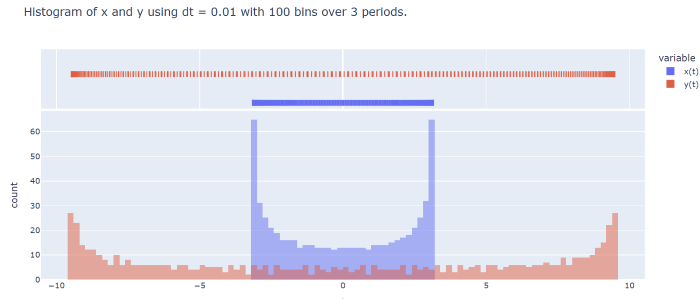
    </div>
</center>

<u>__Data Driven Analysis__<u>

Our goal now is to start with this solution and simulate observed data points from this system using multiple viewpoints in $3D$ space. This will provide a high dimensional observation set of what should be a $2D$ system. We introduce random noise to simulate error in the sensors or the system. Then, we will run a Principal Component Analysis and see what information it reveals. Note the output of PCA will vary based on the composition of this dataset. For example, the long and narrow features of the starting solution might be lost. We will choose viewpoints that capture the spatial relationships of $x$ and $y$ well with minmial loss of information. As an alternative, one could perform PCA on the initial dataset itself.

First, add noise to the system and visualize.

In [4]:
L = 30*(2*np.pi/3) #do 20 rotations of the ellipse
t = np.arange(0, L , 0.1)
x_t = np.sin(3*t) + 3*np.cos(3*t) + np.random.normal(loc=0.0, scale=0.6, size=len(t))
y_t = 3*np.cos(3*t) - 9*np.sin(3*t) + np.random.normal(loc=0.0, scale=0.6, size=len(t))
fig = px.scatter({'t': t, 'x(t)': x_t, 'y(t)':y_t},
                 x='x(t)',
                 y = 'y(t)',
                 title = f'x versus y scatter plot with normal noise',
                 width = 500,
                 height = 700,
                 range_x = [-6, 6],
                 range_y = [-12, 12])
#fig.show()

Static result:

<center>
    <div>
       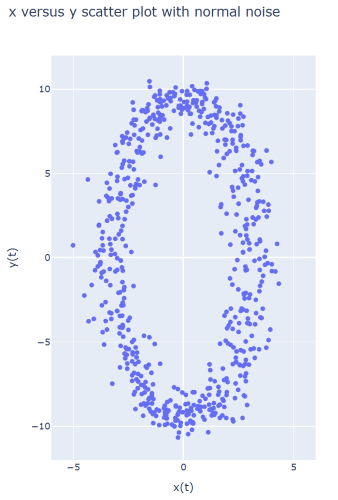
    </div>
</center>

We now define four planes using their orthogonal basis vectors and project the data onto them.

In [5]:
initial_points = np.vstack([x_t, np.zeros(len(x_t)), y_t])

#Play with this variable to see how end result changes.
#The following will slightly rotate our viewpoint so that 
#the end results will be roughly the shape we started with,
#but this wont always be the case.
planes_rotation = [[[1, 0, 0],[0, 0, 1]], 
                      [[2, 2, 0],[0, 0, 1]],
                      [[3, 5, 0],[0, 0, 1]], 
                      [[5, 7, 0],[0, 0, 1]]]

#planes_rotation = [[[1, 0, 0],[0, 0, 1]],
#                   [[1, 0, 0],[0, 0, 1]]]

proj_arrs_categ = {}
for ix, plane in enumerate(planes_rotation):
    # make unit vectors, this helps make sure the projections are each referring to the same 'unit' length
    plane_arr = np.array(plane).T
    normed_basis = plane_arr/np.linalg.norm(plane_arr, axis = 0)
    #print(normed_basis.T @ normed_basis) #should be the identity
    # project the data, only need the transpose
    proj = normed_basis.T @ initial_points
    proj_arrs_categ[ix] = proj

Now, we plot the new data to inspect it. Note the above vectors correspond to rotating your viewpoint about the vertical axis if viewing the orginal data in 3 dimensions with $y$-coordinates of $0$ on the xyz-coordinate system.

In [6]:
figures = []
for i in range(len(proj_arrs_categ)):
    pts = proj_arrs_categ[i] #shape (2, N)
    fig = px.scatter(x=pts[0,:],
                 y = pts[1,:],
                 title = f'Data projected onto plane {i + 1}',
                    range_x = [-5, 5],
                    range_y = [-10,10])
    figures.append(fig)

fig = make_subplots(rows=len(proj_arrs_categ), cols=1, shared_xaxes=True) 
for i, figure in enumerate(figures):
    for trace in range(len(figure["data"])):
        fig.add_trace(figure["data"][trace], row = i+1, col = 1)
        
#fig.update_layout(height=600, width=300, title_text="New measured data.")
#fig.show()

Static result:

<center>
    <div>
       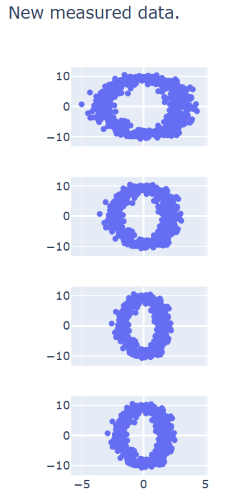
    </div>
</center>

Form the full projected dataset acting as the observd data. It has shape (N samples, 8).

In [7]:
arr_ls = [i.T for i in proj_arrs_categ.values()]
X = np.hstack(arr_ls)
print(X.shape) 

(629, 8)


Perform the steps of PCA.

In [8]:
X_mean_sub = X - np.mean(X, axis = 0)

n = len(X_mean_sub)
C = (1/(n-1))*X_mean_sub.T @ X_mean_sub
eigenvalues, eigenvectors = scipy.sparse.linalg.eigs(C, min(5, X_mean_sub.shape[1] - 2), which = 'LR')
eigenvalues = [i.real for i in eigenvalues]
eigenvectors = [eigenvectors[:,i].real for i in range(eigenvectors.shape[1])]

sorted_evals, sorted_evecs = zip(*sorted(zip(eigenvalues, eigenvectors), reverse = True))

#plot the eigenvalues
fig = px.scatter(x=range(1, len(sorted_evals) + 1),
                 y = sorted_evals,
                 title = f'Eigenvalues/variances')
#fig.show()

#find the principal components using the first two eigenvectors
V = np.hstack([sorted_evecs[0].reshape(-1, 1), sorted_evecs[1].reshape(-1, 1)])
PC = X_mean_sub @ V #shape (N, 2)
explained_variance = sum(sorted_evals[:2])/sum(sorted_evals)
print('Eigenvalues = ', sorted_evals[:5])
print('Explained variance = ', 100*explained_variance, '%')

Eigenvalues =  (180.5383407316052, 11.375359938936901, 4.500478557596392e-16, 1.6351381379258332e-31, -1.4284327653024453e-30)
Explained variance =  100.0 %


Static result:

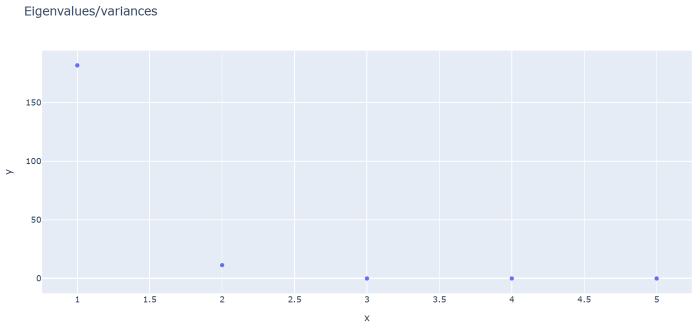

It is clear the vast majority of the variance in this system is captured by the <u>first two principal components</u>, so we projected onto the first two eigenvectors. We started with 8-dimensional data and were able to reduce it down to 2 dimensions while preserving nearly $100\%$ of the variance. This is a very synthetic example, so in reality expect a much lower percentage.

Now, let's see what $x$ and $y$ look like when graphed together as a scatter plot.

In [9]:
fig = px.scatter(x=PC[:,0],
                 y = PC[:,1],
                 title = f'Data projected onto the first two Principal Directions')
#fig.show()

Static image:

<center>
    <div>
       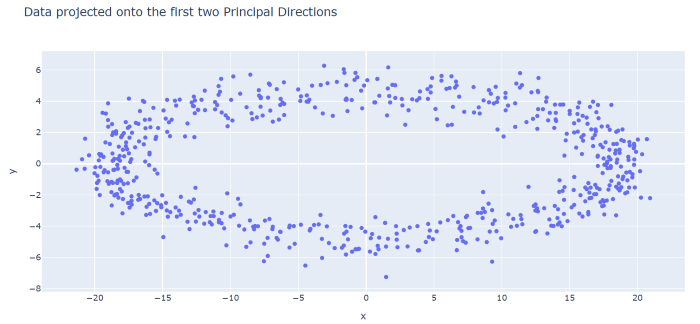
    </div>
</center>

We have what roughly looks like our original ellipse, but rotated and scaled. We can still detect the fact that the boundaries of the range of the major axis are approximately $3$ times that of the minor axis. We can see from the truth $x(t)$ and $y(t)$ plots from the beginning of the notebook that when $x = \pm3$, $y$ is increasing quickly to $\pm 9$ and stays there until the slower $x$ dynamics push it over the corner to the next corner. This is shown by the clustering of points on the ends of the ellipse.

We now view the time dynamics that the Principal Components estimated.


In [10]:
t = np.arange(len(PC))

fig = px.line({'t': t, 'x_pc(t)':PC[:,0], 'y_pc(t)': PC[:,1]}, x = 't', y = ['x_pc(t)', 'y_pc(t)'], title = f'PC output over time')
#fig.show()

Static image:

<center>
    <div>
       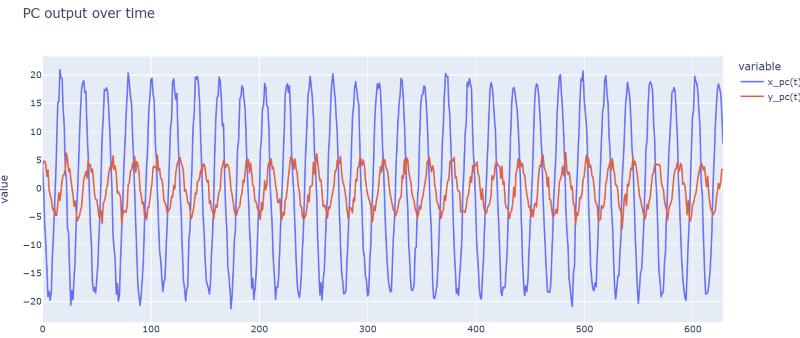
    </div>
</center>

This is a pretty close approximation to the above $x(t)$ and $y(t)$ plots, although scaled.

I hope this notebook was interesting/educational. Thank you for reading.